In [4]:
pwd

'C:\\Users\\emr_f\\Desktop\\veri madenciliği\\çalışmalar\\gradient_descent'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
veri= pd.read_excel("..//veriseti//egea_fiyatlar.xlsx")
veri_np= veri.to_numpy()

In [266]:
X_train= veri_np[:20,0]
Y_train= veri_np[:20,1]

X_test= veri_np[20:,0]
Y_test= veri_np[20:,1]

In [268]:
epoch= 10
w0= 1100
w1=-3
xR= 0.0001
m= len(X_train) 
kayiplar= []

In [270]:
def turev_w0(w0, w1, X_train, Y_train):
    toplam= 0
    for i in range(m):
        toplam+= w0 + w1*X_train[i] - Y_train[i]
    return toplam/m
def turev_w1(w0, w1, X_train, Y_train):
    toplam= 0
    for i in range(m):
        toplam+= (w0 + w1*X_train[i] - Y_train[i])*X_train[i]
    return toplam/m 

In [272]:
def kayip(w0, w1, x, y):
    tahmin= 0
    loss= 0
    for i in range(len(x)):
        tahmin= w0 + w1*x[i] 
        loss+= (tahmin - y[i])**2
    return loss/len(x)
    

In [274]:
def tahminF(w0, w1, X_test, Y_test):
    for i in range(len(X_test)):
        tahmin= w0 + w1*X_test[i]
        print(f'{i}. test örneği için tahmin: {tahmin:.3f} gerçek: {Y_test[i]}')

In [276]:
for i in range(epoch):
    w0_yeni= w0 - xR*turev_w0(w0, w1, X_train, Y_train)
    w1_yeni= w1 - xR*turev_w1(w0, w1, X_train, Y_train)
    w0= w0_yeni
    w1= w1_yeni

    
    loss= kayip(w0, w1, X_train, Y_train)
    kayiplar.append(loss)
    print(f'{i} epoch için kayıp: {loss:.0f}')
tahminF(w0, w1, X_test, Y_test)


0 epoch için kayıp: 7531
1 epoch için kayıp: 7427
2 epoch için kayıp: 7416
3 epoch için kayıp: 7415
4 epoch için kayıp: 7415
5 epoch için kayıp: 7415
6 epoch için kayıp: 7415
7 epoch için kayıp: 7415
8 epoch için kayıp: 7415
9 epoch için kayıp: 7414
0. test örneği için tahmin: 903.030 gerçek: 870
1. test örneği için tahmin: 792.417 gerçek: 720
2. test örneği için tahmin: 840.979 gerçek: 875
3. test örneği için tahmin: 938.103 gerçek: 910
4. test örneği için tahmin: 638.637 gerçek: 685


In [278]:
print(w0)
print(w1)

1099.976119386767
-2.697887542451809


In [280]:
np.arange(epoch)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

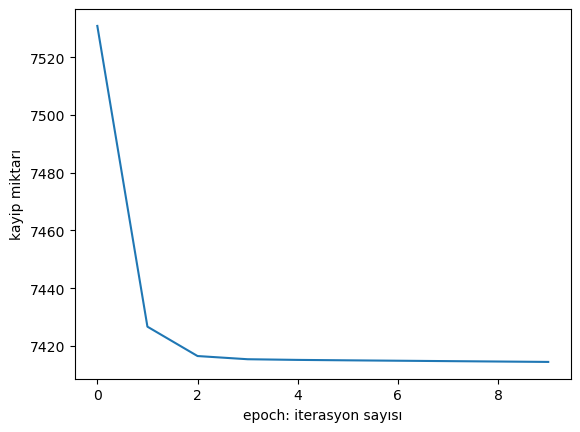

In [282]:
plt.plot(np.arange(epoch),kayiplar)
plt.xlabel("epoch: iterasyon sayısı")
plt.ylabel("kayip miktarı")
plt.show()